In [42]:
import re
from nltk.stem import PorterStemmer 
import pandas as pd
import numpy as np

**Instructions:**

1. Make sure you submit the solutions before the deadline (**Wednesday Wed. 13, 2024 by midnight**). Late submission will be penalized as follows: late within one day (24 hours): 15% penalty; late within two days: 30% penalty, late within three days: 40% penalty. Submission after three days will not be accepted.

2. Discussion with classmates on the problems is not allowed. All clarification questions should be directed to me. You should be responsible for the debugging of the code.

3. Make sure you rerun the whole Jupyter file one last time before submission. The cell numbers should be consecutive starting from 1.

4. After you submit your code, it is your responsibility to check if you submitted the correct file. Sometimes an empty file is submitted by mistake. I will treat any resubmissions past the deadline that are due to such mistakes as late submissions.

5. Please utilize the time wisely. Do not wait until the last few days to start working on the project.

Good luck!

# Midterm Project-Building a Spam Filter

The purpose of this project is to train a classifier to detect email spams (spam $y=1$, non-spam $y=0$).

First, we need to change any text email to numerical values (a feature vector $\boldsymbol{x}\in\mathbb{R}^n$). We walk through the steps of constructing such a vector from an email.

## Preprocessing Emails (20 pts)

The file named "email1.txt" contains an example email that contains words, numbers, an email address, a URL, special letters (e.g. the dollar sign). Since many emails may contain numbers, email addresses, URLs, special letters, it is common practice to "normalize" these values, so that all email addresses, URLs, etc. are treated the same. For example, we can replace any URL with a special string "httpaddress" to indicate a URL exists. The purpose is to let the spam classifier know a URL is present, instead of what the URL is. Following this idea, we will implement the following steps for any raw email:

1. Lower-casing: convert all letters to lower case
2. Normalizing URLs: All URLs are replaced with the text "httpaddr".
3. Normalizing email addresses: Replace all email addresses with the text "emailaddr"
4. Normalizing numbers: Replace all numbers with the text "number".
5. Normalizing Dollars: Replace all dollar signs $\$$ with the text "dollar".
6. Stemming words: For example, "replacing", "replaces", "replaced" are all replaced with "replace"
7. Removing non-words: Remove non-words and punctuations. All white spaces (tabs, newlines ('\n'), spaces) should be trimmed to a single space character.

To achieve all the 7 steps, we look at an example. Read in "email1.txt" as a single string:

In [44]:
email = open('email1.txt', 'r').read()
email

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

Here are the codes to realize all the steps above in Python. Suppose we have a string variable named str1.

1. str1.lower() converts all uppercase characters in str1 into lowercase characters (note that str1 itself does not change.)
2. Replace URLs by: re.sub(r'(http|https)://[^\s]*', 'httpaddr', str1)
3. Replace email addresses by: re.sub('[^\s]+@[^\s]+', 'emailaddr', str1);
4. Replace all numbers by: re.sub('[0-9]+', 'number', str1)
5. Replace dollar sign by: re.sub('[$]+', 'dollar', str1)
6. Word Stemming: first build a PorterStemmer class by: ps = PorterStemmer(), then stemming the words by: 

str1 = " ".join([ps.stem(word) for word in str1.split()])

7. Remove non-words and punctuations by: 

In [45]:
import re
from nltk.stem import PorterStemmer

# Example string
#str1 = "This Is a: sString. Cointains. text"

# Step 1: Lower-casing
str1 = str1.lower()

# Step 2: Replace URLs
str1 = re.sub(r'(http|https)://[^\s]*', 'httpaddr', str1)

# Step 3: Replace email addresses
str1 = re.sub('[^\s]+@[^\s]+', 'emailaddr', str1)

# Step 4: Replace all numbers
str1 = re.sub('[0-9]+', 'number', str1)

# Step 5: Replace dollar signs
str1 = re.sub('[$]+', 'dollar', str1)

# Step 6: Word Stemming
ps = PorterStemmer()
str1 = " ".join([ps.stem(word) for word in str1.split()])

# Step 7: Remove non-words and punctuations
str1 = re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', str1)

# Step 8: Trim white spaces to a single space character
str1 = re.sub(r'\s+', '', str1)

# Step 9: Finally strip the string (remove spaces at the beginning and at the end of the string)
str1 = str1.strip()





Trim white spaces to a single space character by: re.sub(r'\s+',' ', str1)

Finally strip the string (remove spaces at the beginning and at the end of the string) by:
str1 = str1.strip()

Try each of this steps on the email string, and see if it works (you don't need to show the process). If everything works, then put everything in a function of the following form: 

In [49]:
def ProcessEmail(emailstring):
    """
    Process the 7 steps above for an email string
    input: emailstring: the string that contains the email content. type: string
    return: a string that is the processed email content
    """
    str1 = emailstring

    # Example string
    #str1 = "This Is a: sString. Cointains. text"

    # Step 1: Lower-casing
    str1 = str1.lower()

    # Step 2: Replace URLs
    str1 = re.sub(r'(http|https)://[^\s]*', 'httpaddr', str1)

    # Step 3: Replace email addresses
    str1 = re.sub('[^\s]+@[^\s]+', 'emailaddr', str1)

    # Step 4: Replace all numbers
    str1 = re.sub('[0-9]+', 'number', str1)

    # Step 5: Replace dollar signs
    str1 = re.sub('[$]+', 'dollar', str1)

    # Step 6: Word Stemming
    ps = PorterStemmer()
    str1 = " ".join([ps.stem(word) for word in str1.split()])

    # Step 7: Remove non-words and punctuations
    str1 = re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', str1)

    # Step 8: Trim white spaces to a single space character
    str1 = re.sub(r'\s+', ' ', str1)

    # Step 9: Finally strip the string (remove spaces at the beginning and at the end of the string)
    str1 = str1.strip()

    
    return str1


email = open('email1.txt', 'r').read()

processed_email = ProcessEmail(email)
print(processed_email)

anyon know how much it cost to host a web portal well it depend on how mani visitor your expecting thi can be anywher from less than number buck a month to a coupl of dollarnumber you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr


Finish the body of the function.

Run the function ProcessEmail for the email string that was read in earlier. If you get the following content, then congratulations, your code works.

anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

## Vocabulary List (25 pts)

After the emails are preprocessed, we now have a string that contains a list of words for
each email. In the next step, we choose the words we would like to use in our classifier and ignore the rest. Suppose, based on a large number of email samples, we have already chosen the most frequently occuring words as the set of words to be considered, known as the vocabulary list, which is stored in vocab.txt. 

In [50]:
vocab = pd.read_csv('vocab.txt', delim_whitespace=True, names=['index', 'word'])
vocab.head(10)

,index,word
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about
5,6,abov
6,7,absolut
7,8,abus
8,9,ac
9,10,accept


Each word has an index.

Given the vocabulary list, we can now map each word in the preprocessed emails into a list of indices, each of which is the index of the word in the vocabulary list. Specifically, in the sample email, the word "anyon" can be mapped onto the index 86 in the vocabulary
list. If a word is not in the vocabulary, ignore it. Now write a function in the following form:

In [53]:
words = processed_email.split()
print (words)
print (type(words))
print(words[2])

['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'your', 'expecting', 'thi', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollarnumber', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big', 'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list', 'send', 'an', 'email', 'to', 'emailaddr']
<class 'list'>
how


In [65]:
def EmailToIndices(processed_email, vocab_df):
    """
    Turn processed email string to a list of indices
    input: processed_email: a string of preprocessed email
           vocab_df: the vocabulary data frame
    return: a list of integers, which are the indices of the words in the vocabulary list
    Hint1: First, you need to turn the email string to a list of words by 
           processed_email.split(); then for each word check if it is in the vocabulary;
           if it is in it, then find the corresponding index and append it to your 
           index list; otherwise ignore it.
    Hint2: To build the list of indices, you can start with an empty list [] and append
           indices one by one as you find them using the append function associated with 
           the list
    Hint3: to check if a word, say "anyon" appears in the "word" column of the vocabulary
           you can use "anyon" in vocab['word'].values, which will give you a True or
           False
    """
    # split into a list of words 
    words = processed_email.split()
    
    index_list = []
    
    # Match by index
    for word in words:
           if word in vocab_df['word'].values:
                  # find the corresponding index list
                  index = vocab_df[vocab_df['word'] == word]['index'].iloc[0]
                  index_list.append(index)
                  
    return index_list

indices = EmailToIndices(processed_email, vocab)
print(indices)

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


Test your EmailToIndices function on the preprocessed email string obtained earlier. If you get the following list of integers, congratulations again, your code works.

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]

## Extracting Features from Emails (25 pts)

Now we will convert each email into a vector in $R^n$ as the features, where $n$ is the number of words in the vocabulary list. Specifically, the feature $x_i=0$ or $1$ for an email depending on whether the $i$-th word in the vocabulary list occurs in the email. That is, $x_i = 1$ if the $i$-th word is in the email and $x_i = 0$ if the i-th word is not present in the email. Write a function that converts a list of indices obtained from the previous function to a feature vector in $R^n$. Follow the following form:

Note: Now we have a list of indices obtained from the previous function
convert list of indices to a feature vector 

In [6]:
def FeatureExtraction(indices, vocab_df):
    """
    Convert a list of word indices to a feature vector
    input: indices: a list of integer, which are the indices of the words in the email
           vocab_df: the vocabulary data frame
    return: a one-dimensional numpy array that contains the features. The size of the
            array is equal to the number of rows of the vocabulary data frame
    PAY ATTENTION: the index in the vocabulary starts with 1, but for numpy array index
                   starts from 0

    """

In [81]:
# we are processing one email at a time
import numpy as np

def vectorForm(indices, vocab_size):
  
    feature_vector = np.zeros(vocab_size)
    
    for index in indices:
        
        feature_vector[index] = 1
    
    return feature_vector


word_indices = EmailToIndices(processed_email, vocab)


vocab_size = len(vocab)   
# Call function
feature_vector = vectorForm(word_indices, vocab_size)

# number of 1's 
number_nonzeros = np.count_nonzero(feature_vector)
print("Number of 1s in vector:", number_nonzeros)

zeros = vocab_size - number_nonzeros
print("Zeros found in vector: ", zeros)

print("Feature vector: ", feature_vector)

print("Vector size: ", len(feature_vector))

'''So, essentially, this code creates a feature vector representing the presence or absence of words from 
the vocabulary in the processed email. Each element of the feature vector corresponds to a word in the 
vocabulary, and its value is 1 if the word is present in the email and 0 otherwise. This representation
allows machine learning algorithms to operate on textual data efficiently.'''

Number of 1s in vector: 42
Zeros found in vector:  1857
Feature vector:  [0. 0. 0. ... 1. 0. 0.]
Vector size:  1899


Run the function on the list of indices obtained from the previous problem to get the feature vector. Report the number of nonzeros in the vector and the size of the vector.

## Training SVM for Spam Classification (30 pts)

Now suppose we have preprocessed a bunch of emails and manually labled them. Each original email was processed using the ProcessEmail, EmailToIndices, and FeatureExtraction functions in sequence, and converted into a vector in $R^{1899}$. We use the data to train a Linear SVM classifier. The file "spamTrain.npy" contains 4000 training examples of spam and non-spam email, while "spamTest.npy" contains 1000 test examples. The last column is the target label (spam: y=1, non-spam: y=0). Use np.load(filename) to read in the data.

1. For training the linear SVM, consider $C=\{0.05, 1.0, 2.0\}$. Set random_state=10, loss='hinge', and all the other parameters are by default. For each model report the accuracy on the test data (LinearSVC has a built in function to calculate accuracy). Also report the best model based on the accuracy values.

2. Look at the parameters $\boldsymbol{w}=\{w_1,w_2,\dots,w_n\}$ of the underlying linear model. Make a plot of the absolute values of $\boldsymbol{w}$ versus the indices $[0,1,2,...n-1]$. Are some weights $w_i$ significantly larger than the rest of the weights from the graph? If so, the words corresponding to the larger weights are the most predictive of spam. Find those words. (Hint: you need to find the indices (positions) of the 15 largest values in the vector $\boldsymbol{w}$. The function np.argsort may help. Check the usage of the function. Then use the indices to find the words in the vocabulary data frame.

/Users/chikior/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/chikior/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/chikior/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Results of testing models with different C values:  
Accuracy for C=0.05: 0.992
Accuracy for C=1.0: 0.977
Accuracy for C=2.0: 0.974
Best model:
C=0.05: Accuracy=0.992


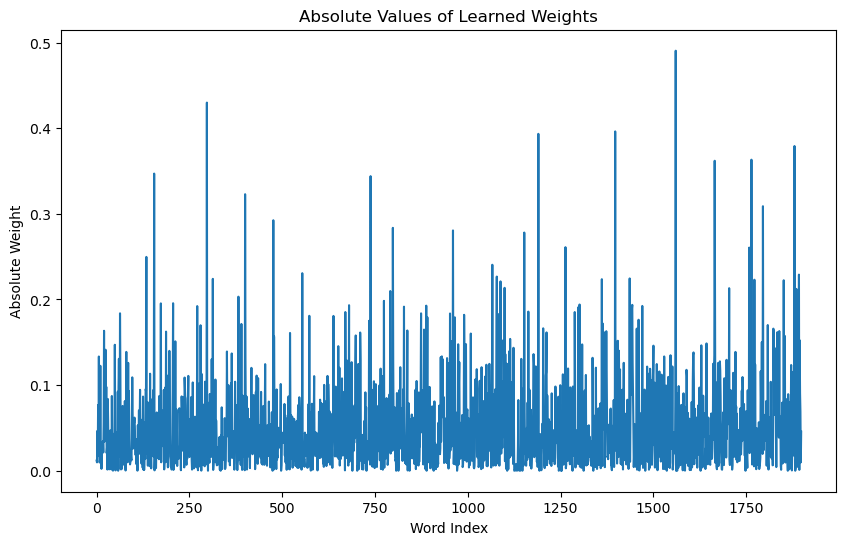

Top 15 spam words: 
numbertnumb
list
httpaddr
dollar
visit
date
guarante
basenumb
the
url
wrote
our
remov
click
spamassassin


In [91]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

vocab = pd.read_csv('vocab.txt', delim_whitespace=True, names=['index', 'word'])


train_data = np.load("spamTrain.npy")
X_train, y_train = train_data[:, :-1], train_data[:, -1]

test_data = np.load("spamTest.npy")
X_test, y_test = test_data[:, :-1], test_data[:, -1]

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

C_values = [0.05, 1.0, 2.0]

results = []
for C in C_values:
    model = LinearSVC(C=C, random_state=10, loss='hinge')
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    results.append((C, model, accuracy))

print("Results of testing models with different C values:  ")
for result in results:
    C, _, accuracy = result
    print(f"Accuracy for C={C}: {accuracy}")

best_C, _, best_accuracy = max(results, key=lambda x: x[2])
print("Best model:")
print(f"C={best_C}: Accuracy={best_accuracy}")


best_model = None
for C, model, _ in results:
    if C == best_C:
        best_model = model
        break

if best_model is None:
    print("Error: Best model not found")
    exit()

weights = best_model.coef_[0]

plt.figure(figsize=(10, 6))
plt.plot(np.abs(weights))
plt.xlabel('Word Index')
plt.ylabel('Absolute Weight')
plt.title('Absolute Values of Learned Weights')
plt.show()

top_indices = np.argsort(np.abs(weights))[-15:]
top_words = []
for index in top_indices:
    top_words.append(vocab.loc[index, 'word'])
print("Top 15 spam words: ")
for word in top_words:
    print(word)
    

